# Introduction to Deep Learning Assignment 2

## Task 1 - MNIST MLP

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os

In [ ]:
#setting the seed

np.random.seed(1337)

In [ ]:
np.random.seed(1337)
#First the mnist dataset
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

def make_mlp_datasets(X_train_full, y_train_full, X_test, y_test):

  num_rows = 28
  num_cols = 28

  X_train_full = X_train_full.reshape(X_train_full.shape[0], 28*28)
  X_test = X_test.reshape(X_test.shape[0], 28*28)

  X_train_full = X_train_full.astype('float32')
  X_test = X_test.astype('float32')

  X_train_full /= 255
  X_test /= 255

  X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
  y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

  X_train = X_train.astype('float32')
  X_test = X_test.astype('float32')
  X_valid= X_valid.astype("float32")
  y_valid = y_valid.astype("float32")

  y_train = keras.utils.to_categorical(y_train, 10)
  y_test = keras.utils.to_categorical(y_test, 10)
  y_valid = keras.utils.to_categorical(y_valid, 10)

  return X_train, y_train, X_valid, y_valid, X_test, y_test

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
np.random.seed(1337)
X_train_mlp, y_train_mlp, X_valid_mlp, y_valid_mlp, X_test_mlp, y_test_mlp = make_mlp_datasets(X_train_full, y_train_full, X_test, y_test)

In [ ]:
feature_vector_length = 784
num_classes = 10

In [ ]:
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


First the weight initialization

In [ ]:

# First lets select the number of hidden layers
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape, kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=keras.initializers.RandomNormal(stddev=0.01)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

157/157 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 0.9506
Test results - Loss: 0.17326189577579498 - Accuracy: 95.06000280380249%


In [ ]:
# Kernel Initializer - RandomNormal(0, 1)
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape, kernel_initializer=keras.initializers.RandomNormal(mean = 0, stddev=1)))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=keras.initializers.RandomNormal(mean = 0, stddev=1)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Epoch 1/5


ValueError: ignored

In [ ]:
# Kernel Initializer - RandomUniform(-0.1, 0.1)
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape, kernel_initializer=keras.initializers.RandomUniform(minval=-0.10, maxval=0.10)))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=keras.initializers.RandomUniform(minval=-0.10, maxval=0.10)))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Test results - Loss: 0.14081484079360962 - Accuracy: 0.954800009727478%


In [ ]:
# Kernel Initializer - Ones (all 1's)
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape, kernel_initializer=keras.initializers.Ones()))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=keras.initializers.Ones()))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Test results - Loss: 0.8770677447319031 - Accuracy: 0.6837999820709229%


In [ ]:
# Kernel Initializer - GlorotNormal
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape, kernel_initializer=keras.initializers.GlorotNormal()))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=keras.initializers.GlorotNormal()))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Test results - Loss: 0.130045086145401 - Accuracy: 0.9602000117301941%


In [ ]:
# Kernel Initializer - HeNormal
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape, kernel_initializer=keras.initializers.HeNormal()))
model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=keras.initializers.HeNormal()))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Test results - Loss: 0.12561647593975067 - Accuracy: 0.9624000191688538%


In [ ]:
# First lets select the number of hidden layers
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Test results - Loss: 0.12186422199010849 - Accuracy: 0.9628000259399414%


Henormal seem to be best. We will continue with this one

Now we select the number of layers

In [ ]:
# 1 Dense layers with 30 neurons
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - with 1 Dense relu layers')

Test results - Loss: 0.1222795769572258 - Accuracy: 0.9648000001907349%


In [ ]:
# 2 Dense layers with 30 neurons
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - with 2 Dense relu layers')

Test results - Loss: 0.1306195855140686 - Accuracy: 0.9611999988555908%


In [ ]:
# 3 Dense layers with 30 neurons
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - with 3 Dense relu layers')

Test results - Loss: 0.1223360076546669 - Accuracy: 0.9642000198364258%


In [ ]:
# 4 Dense layers with 30 neurons
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - with 4 Dense relu layers')

Test results - Loss: 0.12483129650354385 - Accuracy: 0.9648000001907349%


In [ ]:
# 5 Dense layers with 30 neurons
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - with 5 Dense relu layers')

Test results - Loss: 0.12672623991966248 - Accuracy: 0.9634000062942505%


4 relu layers and one soft max layer seem to work best. Now I will check how many neurons we will use on our network relu layers

In [ ]:
# Different number of Neurons
for i in [10,20,30,40,50,75,100]:
  
  model = keras.models.Sequential()

  model.add(keras.layers.Dense(i, activation="relu", input_shape = input_shape))
  model.add(keras.layers.Dense(i, activation="relu"))
  model.add(keras.layers.Dense(i, activation="relu"))
  model.add(keras.layers.Dense(i, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

  test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=0)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - Number of neurons in a layer - {i}')

Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7682 - accuracy: 0.7545
Epoch 2/2
157/157 [==============================] - 1s 3ms/step - loss: 0.3329 - accuracy: 0.9092
Test results - Loss: 0.3329411447048187 - Accuracy: 90.92000126838684%
Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4665 - accuracy: 0.8550
Epoch 2/2
157/157 [==============================] - 1s 3ms/step - loss: 0.1718 - accuracy: 0.9488
Test results - Loss: 0.17181625962257385 - Accuracy: 94.88000273704529%
Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3694 - accuracy: 0.8906
Epoch 2/2
157/157 [==============================] - 1s 3ms/step - loss: 0.1481 - accuracy: 0.9586
Test results - Loss: 0.1481299251317978 - Accuracy: 95.85999846458435%
Epoch 1/2
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3340 - accuracy: 0.8992
Epoch 2/2
157/157 [==============================] - 1s 3ms/step - loss: 0.1207 - acc

100 neurons seem to be good for now. Lets test the optimizers now.

In [ ]:
for optimizer_choice in ['adam', 'nadam', 'sgd', 'adadelta']:
  model = keras.models.Sequential()

  model.add(keras.layers.Dense(100, activation="relu", input_shape = input_shape))
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
  model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)

  test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - for optimizer {optimizer_choice}')

Epoch 1/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2468 - accuracy: 0.9257
Epoch 2/3
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1099 - accuracy: 0.9664
Epoch 3/3
157/157 [==============================] - 1s 3ms/step - loss: 0.0929 - accuracy: 0.9726
Test results - Loss: 0.09292969107627869 - Accuracy: 97.2599983215332%
Epoch 1/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2471 - accuracy: 0.9253
Epoch 2/3
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1076 - accuracy: 0.9669
Epoch 3/3
157/157 [==============================] - 1s 3ms/step - loss: 0.0855 - accuracy: 0.9744
Test results - Loss: 0.0854797512292862 - Accuracy: 97.4399983882904%
Epoch 1/3
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2480 - accuracy: 0.9255
Epoch 2/3
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1086 - accuracy: 0.9673
Epoch 3/3
157/157 [==============================

Except Adadelta, they all seem to perform similar but nadam seem to perform best. So we select adam. Now I will check if adding droping layers will help our model or not.


In [ ]:
for i in [0.1,0.3,0.5,0.7]:
  model = keras.models.Sequential()
  #model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(100, activation="relu", input_shape = input_shape))
  model.add(keras.layers.Dropout(rate = i))  
  model.add(keras.layers.Dense(100, activation="relu", ))
  model.add(keras.layers.Dropout(rate = i))  
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dropout(rate = i))  
  model.add(keras.layers.Dense(100, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
  model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)
  test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - for Dropout rate = {i}')

Test results - Loss: 0.08448442071676254 - Accuracy: 0.9746000170707703%
Test results - Loss: 0.10637890547513962 - Accuracy: 0.972000002861023%
Test results - Loss: 0.15029391646385193 - Accuracy: 0.9598000049591064%
Test results - Loss: 0.5136427879333496 - Accuracy: 0.8159999847412109%


Dropping seem to work with a rate of 0.1. So we will use this. Now, we will check if regularization works with L1 and L2 penalties

In [ ]:
from keras.regularizers import l1_l2
for i in [0,0.0001,0.001,0.01,0.1]:
  for j in [0,0.0001,0.001,0.01,0.1]:
    model = keras.models.Sequential()
    #model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(100, activation="relu",  kernel_regularizer=l1_l2(l1=i, l2=j)))
    model.add(keras.layers.Dropout(rate = 0.1))  
    model.add(keras.layers.Dense(100, activation="relu", kernel_regularizer=l1_l2(l1=i, l2=j)))
    model.add(keras.layers.Dropout(rate = 0.1))  
    model.add(keras.layers.Dense(100, activation="relu",  kernel_regularizer=l1_l2(l1=i, l2=j)))
    model.add(keras.layers.Dropout(rate = 0.1))  
    model.add(keras.layers.Dense(100, activation="relu",  kernel_regularizer=l1_l2(l1=i, l2=j)))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
    model.fit(X_train_mlp, y_train_mlp, verbose=0, epochs=3)
    test_results = model.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
    print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% , with regularization values l1={i},l2={j}')

Test results - Loss: 0.08649467676877975 - Accuracy: 0.973800003528595% , at iteration 0,0
Test results - Loss: 0.1435314565896988 - Accuracy: 0.9750000238418579% , at iteration 0,0.0001
Test results - Loss: 0.2242714911699295 - Accuracy: 0.9724000096321106% , at iteration 0,0.001
Test results - Loss: 0.4816740155220032 - Accuracy: 0.9490000009536743% , at iteration 0,0.01
Test results - Loss: 1.7880134582519531 - Accuracy: 0.3953999876976013% , at iteration 0,0.1
Test results - Loss: 0.31137794256210327 - Accuracy: 0.9710000157356262% , at iteration 0.0001,0
Test results - Loss: 0.3238683044910431 - Accuracy: 0.9696000218391418% , at iteration 0.0001,0.0001
Test results - Loss: 0.36354881525039673 - Accuracy: 0.9617999792098999% , at iteration 0.0001,0.001
Test results - Loss: 0.5452117919921875 - Accuracy: 0.9508000016212463% , at iteration 0.0001,0.01
Test results - Loss: 2.302046298980713 - Accuracy: 0.11259999871253967% , at iteration 0.0001,0.1
Test results - Loss: 0.581111788749

We see that using a penalty on our weights does not help. So we will not use a penalty. Lastly we will look for weight initializing strategies.

In [ ]:
from tensorflow.keras import initializers

final_mlp = keras.models.Sequential()

final_mlp.add(keras.layers.Dense(100, activation="relu", input_shape = input_shape))
final_mlp.add(keras.layers.Dropout(rate = 0.1))  
final_mlp.add(keras.layers.Dense(100, activation="relu", input_shape = input_shape ))
final_mlp.add(keras.layers.Dropout(rate = 0.1))  
final_mlp.add(keras.layers.Dense(100, activation="relu", input_shape = input_shape))
final_mlp.add(keras.layers.Dense(10, activation="softmax"))
final_mlp.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
final_mlp.fit(X_train_mlp, y_train_mlp,  verbose=1, epochs = 5)
test_results = final_mlp.evaluate(X_valid_mlp, y_valid_mlp, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Epoch 1/5
1719/1719 [==============================] - 12s 5ms/step - loss: 0.2932 - accuracy: 0.9120
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1426 - accuracy: 0.9565
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1086 - accuracy: 0.9665
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0933 - accuracy: 0.9712
Epoch 5/5
157/157 [==============================] - 1s 3ms/step - loss: 0.0795 - accuracy: 0.9748
Test results - Loss: 0.07954840362071991 - Accuracy: 97.47999906539917%


## Task 1 - MNIST CNN

In [ ]:
#First the mnist dataset
mnist = keras.datasets.mnist
(X_train_full_cnn, y_train_full_cnn), (X_test_full_cnn, y_test_full_cnn) = mnist.load_data()

def make_cnn_datasets(X_train_full_cnn, y_train_full_cnn, X_test_full_cnn, y_test_full_cnn):
  num_rows = 28
  num_cols = 28

  X_train_full_cnn = X_train_full_cnn.reshape(X_train_full_cnn.shape[0], num_rows, num_cols, 1)
  X_test_full_cnn = X_test_full_cnn.reshape(X_test_full_cnn.shape[0], num_rows, num_cols, 1)
  input_shape = (num_rows, num_cols, 1)

  X_train_full_cnn = X_train_full_cnn.astype('float32')
  X_test_full_cnn = X_test_full_cnn.astype('float32')

  X_train_full_cnn /= 255
  X_test_full_cnn /= 255

  X_valid_cnn, X_train_cnn = X_train_full_cnn[:5000], X_train_full_cnn[5000:]
  y_valid_cnn, y_train_cnn = y_train_full_cnn[:5000], y_train_full_cnn[5000:]

  X_train_cnn = X_train_cnn.astype('float32')
  y_train_cnn = y_train_cnn.astype('float32')
  X_valid_cnn = X_valid_cnn.astype("float32")
  y_valid_cnn = y_valid_cnn.astype("float32")

  y_train_cnn = keras.utils.to_categorical(y_train_cnn, 10)
  y_test_cnn = keras.utils.to_categorical(y_test_full_cnn, 10)
  y_valid_cnn = keras.utils.to_categorical(y_valid_cnn, 10)

  return X_train_cnn, y_train_cnn, X_valid_cnn, y_valid_cnn, X_test_full_cnn, y_test_cnn, input_shape

In [ ]:
X_train_cnn, y_train_cnn, X_valid_cnn, y_valid_cnn, X_test_cnn, y_test_cnn, input_shape = make_cnn_datasets(X_train_full_cnn, y_train_full_cnn, X_test_full_cnn, y_test_full_cnn)

In [ ]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(activation='relu', padding="SAME",filters=64, kernel_size=7, input_shape=input_shape))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=128))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=128))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=256))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=256))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=128, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn, epochs=2, validation_data=(X_valid_cnn, y_valid_cnn))
test_results = cnn.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - "Default" - book model')

Epoch 1/2
1719/1719 [==============================] - 57s 17ms/step - loss: 0.3933 - accuracy: 0.8796 - val_loss: 0.0814 - val_accuracy: 0.9830
Epoch 2/2
313/313 [==============================] - 3s 9ms/step - loss: 0.0370 - accuracy: 0.9897
Test results - Loss: 0.03700912743806839 - Accuracy: 0.9897000193595886% - "Default" - book model


In [ ]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(activation='relu', padding="SAME",filters=64, kernel_size=7, input_shape=input_shape))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=128))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=128))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=128, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn, epochs=2, validation_data=(X_valid_cnn, y_valid_cnn))
test_results = cnn.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - Only 1 "Convolutional" Layer')

Epoch 1/2
1719/1719 [==============================] - 20s 11ms/step - loss: 0.4375 - accuracy: 0.8598 - val_loss: 0.0635 - val_accuracy: 0.9824
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.0498 - accuracy: 0.9851
Test results - Loss: 0.049847688525915146 - Accuracy: 0.9850999712944031% - Only 1 "Convolutional" Layer


There was a 30% decrease in computing time with only a very small decrease in accuracy

In [ ]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(activation='relu', padding="VALID",filters=64, kernel_size=7, input_shape=input_shape))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=128, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn, epochs=2, validation_data=(X_valid_cnn, y_valid_cnn))
test_results = cnn.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - Padding = VALID')

Epoch 1/2
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3639 - accuracy: 0.8892 - val_loss: 0.0873 - val_accuracy: 0.9778
Epoch 2/2
313/313 [==============================] - 1s 5ms/step - loss: 0.0471 - accuracy: 0.9876
Test results - Loss: 0.047081414610147476 - Accuracy: 0.9876000285148621% - Padding = VALID


The VALID option for the padding is giving a slightly better test set accuracy - of course this could be just due to chance but we will stick with it.

In [ ]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(activation='relu', padding="VALID",filters=64, kernel_size=7, input_shape=input_shape))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=128, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn, epochs=2, validation_data=(X_valid_cnn, y_valid_cnn))
test_results = cnn.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - Optimizer - NAdam')

Epoch 1/2
1719/1719 [==============================] - 26s 14ms/step - loss: 0.3097 - accuracy: 0.9075 - val_loss: 0.0729 - val_accuracy: 0.9824
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.0458 - accuracy: 0.9889
Test results - Loss: 0.045805204659700394 - Accuracy: 0.9889000058174133% - Optimizer - NAdam


Slighly better results (almost negligible), but the compute time had quite the increase. We will use Adam optimizer, because of that reasoning.

In [ ]:
cnn = keras.models.Sequential()
cnn.add(keras.layers.Conv2D(activation='relu', padding="VALID",filters=64, kernel_size=14, input_shape=input_shape))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
cnn.add(keras.layers.MaxPooling2D(pool_size=2))
cnn.add(keras.layers.Flatten())
cnn.add(keras.layers.Dense(units=128, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(units=10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn.fit(X_train_cnn, y_train_cnn, epochs=2, validation_data=(X_valid_cnn, y_valid_cnn))
test_results = cnn.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - Kernel size - 14')

Epoch 1/2
1719/1719 [==============================] - 15s 8ms/step - loss: 0.3674 - accuracy: 0.8925 - val_loss: 0.1018 - val_accuracy: 0.9758
Epoch 2/2
313/313 [==============================] - 1s 5ms/step - loss: 0.0680 - accuracy: 0.9829
Test results - Loss: 0.06804630160331726 - Accuracy: 0.9829000234603882% - Kernel size - 14


In [ ]:
final_cnn = keras.models.Sequential()
final_cnn.add(keras.layers.Conv2D(activation='relu', padding="VALID",filters=64, kernel_size=7, input_shape=input_shape))
final_cnn.add(keras.layers.MaxPooling2D(pool_size=2))
final_cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
final_cnn.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="VALID",filters=128))
final_cnn.add(keras.layers.MaxPooling2D(pool_size=2))
final_cnn.add(keras.layers.Flatten())
final_cnn.add(keras.layers.Dense(units=128, activation='relu'))
final_cnn.add(keras.layers.Dense(units=64, activation='relu'))
final_cnn.add(keras.layers.Dropout(0.75))
final_cnn.add(keras.layers.Dense(units=10, activation='softmax'))

final_cnn.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
final_cnn.fit(X_train_cnn, y_train_cnn, epochs=5, validation_data=(X_valid_cnn, y_valid_cnn))
test_results = final_cnn.evaluate(X_test_cnn, y_test_cnn, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Epoch 1/5
1719/1719 [==============================] - 43s 9ms/step - loss: 0.4312 - accuracy: 0.8539 - val_loss: 0.0688 - val_accuracy: 0.9840
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1674 - accuracy: 0.9489 - val_loss: 0.0608 - val_accuracy: 0.9876
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1273 - accuracy: 0.9592 - val_loss: 0.0765 - val_accuracy: 0.9840
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.1178 - accuracy: 0.9615 - val_loss: 0.0460 - val_accuracy: 0.9906
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0567 - accuracy: 0.9906
Test results - Loss: 0.05670209974050522 - Accuracy: 99.05999898910522%


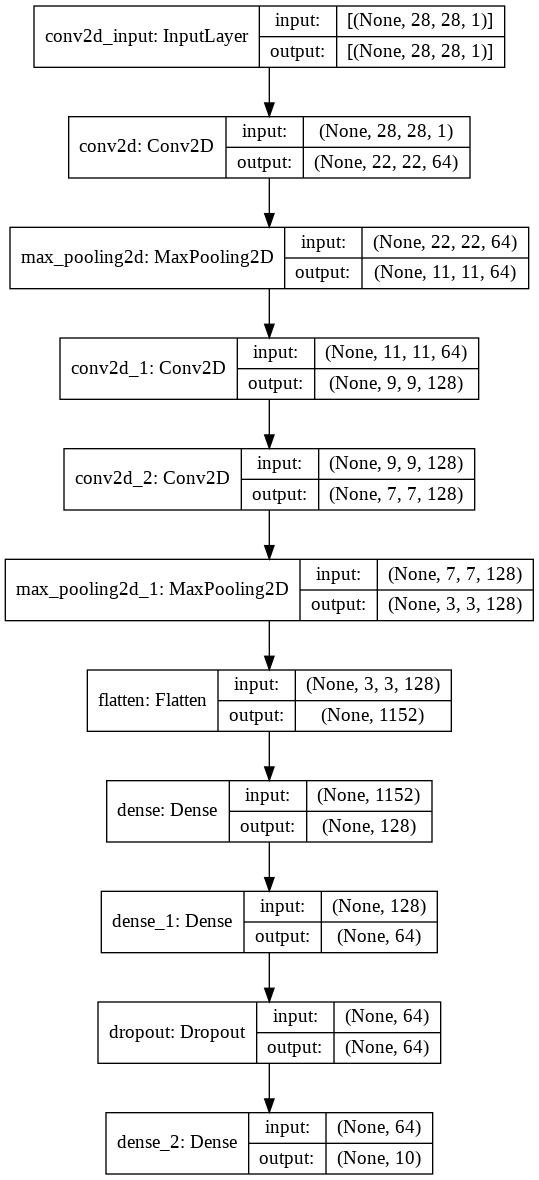

In [ ]:
tf.keras.utils.plot_model(
    final_cnn,
    to_file="final_cnn.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

## Task 1 - Fashion MNIST MLP

In [ ]:
# Loading the Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_mlp_f, y_train_full_mlp_f), (X_test_mlp_f, y_test_mlp_f) = fashion_mnist.load_data()

X_train_mlp_f, y_train_mlp_f, X_valid_mlp_f, y_valid_mlp_f, X_test_mlp_f, y_test_mlp_f = make_mlp_datasets(X_train_full_mlp_f, y_train_full_mlp_f, X_test_mlp_f, y_test_mlp_f)

feature_vector_length = 784
num_classes = 10
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp_f, y_train_mlp_f, verbose=1, epochs=2)

test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - "Default" model')

Epoch 1/2
1719/1719 [==============================] - 9s 4ms/step - loss: 0.5748 - accuracy: 0.8020
Epoch 2/2
157/157 [==============================] - 1s 3ms/step - loss: 0.4153 - accuracy: 0.8602
Test results - Loss: 0.4152516722679138 - Accuracy: 86.01999878883362% - "Default" model


In [ ]:
initializers = [keras.initializers.RandomNormal(stddev=0.01),keras.initializers.RandomNormal(mean = 0, stddev=1),
                keras.initializers.RandomUniform(minval=-0.10, maxval=0.10), keras.initializers.Ones(),keras.initializers.GlorotNormal()]
for i in initializers:
  # First lets select the number of hidden layers
  model = keras.models.Sequential()
  #model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape, kernel_initializer=i))
  model.add(keras.layers.Dense(10, activation="softmax", kernel_initializer=i))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

  test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

157/157 [==============================] - 1s 3ms/step - loss: 0.3777 - accuracy: 0.8706
Test results - Loss: 0.3776945471763611 - Accuracy: 87.05999851226807%
157/157 [==============================] - 1s 3ms/step - loss: 0.7732 - accuracy: 0.7120
Test results - Loss: 0.7731862664222717 - Accuracy: 71.20000123977661%
157/157 [==============================] - 1s 3ms/step - loss: 0.3568 - accuracy: 0.8736
Test results - Loss: 0.3568284809589386 - Accuracy: 87.36000061035156%
157/157 [==============================] - 1s 3ms/step - loss: 0.8818 - accuracy: 0.6478
Test results - Loss: 0.8818278312683105 - Accuracy: 64.78000283241272%
157/157 [==============================] - 1s 3ms/step - loss: 0.3712 - accuracy: 0.8678
Test results - Loss: 0.37123721837997437 - Accuracy: 86.77999973297119%


Deciding on layers

In [ ]:
# First lets select the number of hidden layers
model = keras.models.Sequential()
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - 1 Dense relu layers')

Test results - Loss: 0.3769111931324005 - Accuracy: 0.8691999912261963%


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - 2 Dense relu layers')

Test results - Loss: 0.35902559757232666 - Accuracy: 0.8708000183105469%


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - 3 Dense relu layers')

Test results - Loss: 0.3445073366165161 - Accuracy: 0.8736000061035156%


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - 4 Dense relu layers')

Test results - Loss: 0.3714909553527832 - Accuracy: 0.8664000034332275%


In [ ]:
model = keras.models.Sequential()

model.add(keras.layers.Dense(30, activation="relu", input_shape = input_shape))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - 5 Dense relu layers')

157/157 [==============================] - 1s 3ms/step - loss: 0.4737 - accuracy: 0.8324
Test results - Loss: 0.4736630916595459 - Accuracy: 83.24000239372253% - 5 Dense relu Layer


3 hidden layers look good now number of neurons

In [ ]:
for i in [10,20,30,40,50,75,100,250]:
  # First lets select the number of hidden layers
  model = keras.models.Sequential()
  #model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(i, activation="relu", input_shape = input_shape))
  model.add(keras.layers.Dense(i, activation="relu"))
  model.add(keras.layers.Dense(i, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

  test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - Number of Neurons - {i}')

157/157 [==============================] - 1s 3ms/step - loss: 0.5221 - accuracy: 0.8190
Test results - Loss: 0.5221332907676697 - Accuracy: 0.8190000057220459% - Number of Neurons - 10
157/157 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.8492
Test results - Loss: 0.43725958466529846 - Accuracy: 0.8492000102996826% - Number of Neurons - 20
157/157 [==============================] - 1s 3ms/step - loss: 0.4780 - accuracy: 0.8356
Test results - Loss: 0.47800201177597046 - Accuracy: 0.8356000185012817% - Number of Neurons - 30
157/157 [==============================] - 1s 3ms/step - loss: 0.4261 - accuracy: 0.8508
Test results - Loss: 0.42606034874916077 - Accuracy: 0.8507999777793884% - Number of Neurons - 40
157/157 [==============================] - 1s 3ms/step - loss: 0.4040 - accuracy: 0.8584
Test results - Loss: 0.40400198101997375 - Accuracy: 0.8583999872207642% - Number of Neurons - 50
157/157 [==============================] - 1s 3ms/step - loss: 0.4

75 loooks good lets try optimizers

In [ ]:
for i in ["sgd", "nadam","adam", "adadelta"]:
  model = keras.models.Sequential()
  #model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(75, activation="relu", input_shape = input_shape))
  model.add(keras.layers.Dense(75, activation="relu"))
  model.add(keras.layers.Dense(75, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer=i, metrics=['accuracy'])
  model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

  test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}% - Optimizer: {i}')

Test results - Loss: 0.38051456212997437 - Accuracy: 0.866599977016449%
Test results - Loss: 0.31609371304512024 - Accuracy: 0.8848000168800354%
Test results - Loss: 0.3224264979362488 - Accuracy: 0.8787999749183655%
Test results - Loss: 1.5441341400146484 - Accuracy: 0.5371999740600586%


Nadam is good. Now  dropout

In [ ]:
for i in [0.1,0.3,0.5,0.7]:
  model = keras.models.Sequential()
  #model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(75, activation="relu", input_shape = input_shape))
  model.add(keras.layers.Dropout(rate = i))  
  model.add(keras.layers.Dense(75, activation="relu", ))
  model.add(keras.layers.Dropout(rate = i))  
  model.add(keras.layers.Dense(75, activation="relu"))
  model.add(keras.layers.Dense(10, activation="softmax"))
  model.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
  model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

  test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% - Droupout rate: {i}')

Test results - Loss: 0.3193815350532532 - Accuracy: 0.8844000101089478%
Test results - Loss: 0.3522694706916809 - Accuracy: 0.8722000122070312%
Test results - Loss: 0.4101892113685608 - Accuracy: 0.8497999906539917%
Test results - Loss: 0.678981363773346 - Accuracy: 0.6886000037193298%


Drop out doesnt help this time. now penalty

In [ ]:
from keras.regularizers import l1_l2
for i in [0,0.0001,0.001,0.01,0.1]:
  for j in [0,0.0001,0.001,0.01,0.1]:
    model = keras.models.Sequential()
    #model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(75, activation="relu",  kernel_regularizer=l1_l2(l1=i, l2=j)))
    model.add(keras.layers.Dense(75, activation="relu", kernel_regularizer=l1_l2(l1=i, l2=j)))
    model.add(keras.layers.Dense(75, activation="relu",  kernel_regularizer=l1_l2(l1=i, l2=j)))
    model.add(keras.layers.Dense(10, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
    model.fit(X_train_mlp_f, y_train_mlp_f, verbose=0, epochs=5)

    test_results = model.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
    print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}% , at iteration {i},{j}')

Test results - Loss: 0.3353384733200073 - Accuracy: 0.8759999871253967% , at iteration 0,0
Test results - Loss: 0.35917946696281433 - Accuracy: 0.883400022983551% , at iteration 0,0.0001
Test results - Loss: 0.45334312319755554 - Accuracy: 0.8709999918937683% , at iteration 0,0.001
Test results - Loss: 0.6263620853424072 - Accuracy: 0.840399980545044% , at iteration 0,0.01
Test results - Loss: 1.04177987575531 - Accuracy: 0.7670000195503235% , at iteration 0,0.1
Test results - Loss: 0.48214513063430786 - Accuracy: 0.8777999877929688% , at iteration 0.0001,0
Test results - Loss: 0.4919813871383667 - Accuracy: 0.873199999332428% , at iteration 0.0001,0.0001
Test results - Loss: 0.5122682452201843 - Accuracy: 0.8661999702453613% , at iteration 0.0001,0.001
Test results - Loss: 0.66790771484375 - Accuracy: 0.8198000192642212% , at iteration 0.0001,0.01
Test results - Loss: 1.0858409404754639 - Accuracy: 0.7396000027656555% , at iteration 0.0001,0.1
Test results - Loss: 0.6684749722480774 -

Test our final model with the test data

In [ ]:
final_mlp_f = keras.models.Sequential()

final_mlp_f.add(keras.layers.Dense(75, activation="relu", input_shape = input_shape))
final_mlp_f.add(keras.layers.Dense(75, activation="relu", ))  
final_mlp_f.add(keras.layers.Dense(75, activation="relu"))
final_mlp_f.add(keras.layers.Dense(10, activation="softmax"))
final_mlp_f.compile(loss='categorical_crossentropy', optimizer="nadam", metrics=['accuracy'])
final_mlp_f.fit(X_train_mlp_f, y_train_mlp_f, verbose=1, epochs=5) # A little more epoch for final model

test_results = final_mlp_f.evaluate(X_valid_mlp_f, y_valid_mlp_f, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1] * 100}%')

Epoch 1/5
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4977 - accuracy: 0.8210
Epoch 2/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3633 - accuracy: 0.8670
Epoch 3/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3285 - accuracy: 0.8791
Epoch 4/5
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3086 - accuracy: 0.8853
Epoch 5/5
157/157 [==============================] - 1s 3ms/step - loss: 0.3155 - accuracy: 0.8856
Test results - Loss: 0.3155222237110138 - Accuracy: 88.55999708175659%


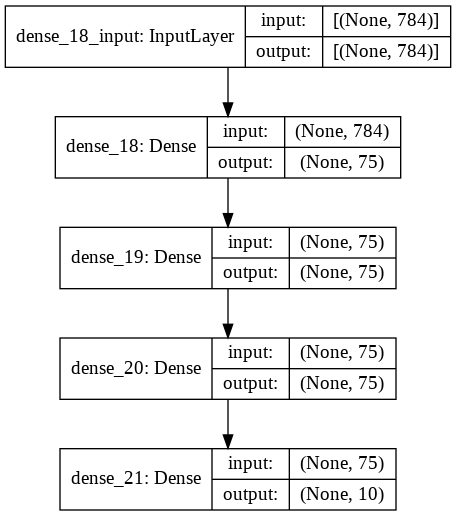

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(final_mlp_f, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Task 1 - Fashion MNIST CNN

In [ ]:
# Loading the Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full_cnn_f, y_train_full_cnn_f), (X_test_cnn_f, y_test_cnn_f) = fashion_mnist.load_data()

X_train_cnn_f, y_train_cnn_f, X_valid_cnn_f, y_valid_cnn_f, X_test_cnn_f, y_test_cnn_f, input_shape = make_cnn_datasets(X_train_full_cnn_f, y_train_full_cnn_f, X_test_cnn_f, y_test_cnn_f)

In [ ]:
cnn_f = keras.models.Sequential()
cnn_f.add(keras.layers.Conv2D(activation='relu', padding="SAME",filters=64, kernel_size=7, input_shape=input_shape))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=64))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=64))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=128))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=128))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Flatten())
cnn_f.add(keras.layers.Dense(units=128, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=64, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=10, activation='softmax'))

cnn_f.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn_f.fit(X_train_cnn_f, y_train_cnn_f, epochs=2, validation_data=(X_valid_cnn_f, y_valid_cnn_f))
test_results = cnn_f.evaluate(X_test_cnn_f, y_test_cnn_f, verbose=1)

print(f'Loss (Test Set): {test_results[0]}')
print(f'Accuracy (Test Set): {test_results[1] * 100}%')

Epoch 1/2
  21/1719 [..............................] - ETA: 4:23 - loss: 2.2972 - accuracy: 0.1042

KeyboardInterrupt: ignored

In [ ]:
cnn_f = keras.models.Sequential()
cnn_f.add(keras.layers.Conv2D(activation='relu', padding="SAME",filters=64, kernel_size=7, input_shape=input_shape))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=64))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=64))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Flatten())
cnn_f.add(keras.layers.Dense(units=128, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=64, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=10, activation='softmax'))

cnn_f.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn_f.fit(X_train_cnn_f, y_train_cnn_f, epochs=2, validation_data=(X_valid_cnn_f, y_valid_cnn_f))
test_results = cnn_f.evaluate(X_test_cnn_f, y_test_cnn_f, verbose=1)

print(f'Loss (Test Set): {test_results[0]}')
print(f'Accuracy (Test Set): {test_results[1] * 100}%')
print(f'Only 1 convolution layer')

Epoch 1/2
1719/1719 [==============================] - 17s 9ms/step - loss: 0.7315 - accuracy: 0.7403 - val_loss: 0.3594 - val_accuracy: 0.8712
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.3416 - accuracy: 0.8743
Loss (Test Set): 0.3416449725627899
Accuracy (Test Set): 87.43000030517578%


In [ ]:
cnn_f = keras.models.Sequential()
cnn_f.add(keras.layers.Conv2D(activation='relu', padding="SAME",filters=64, kernel_size=7, input_shape=input_shape))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=256))
cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=256))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Flatten())
cnn_f.add(keras.layers.Dense(units=128, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=64, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=10, activation='softmax'))

cnn_f.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn_f.fit(X_train_cnn_f, y_train_cnn_f, epochs=2, validation_data=(X_valid_cnn_f, y_valid_cnn_f))
test_results = cnn_f.evaluate(X_test_cnn_f, y_test_cnn_f, verbose=1)

print(f'Loss (Test Set): {test_results[0]}')
print(f'Accuracy (Test Set): {test_results[1] * 100}%')
print(f'Filter = 256 for Conv2D Layer')

Epoch 1/2
1719/1719 [==============================] - 29s 16ms/step - loss: 0.7291 - accuracy: 0.7403 - val_loss: 0.3506 - val_accuracy: 0.8794
Epoch 2/2
313/313 [==============================] - 2s 8ms/step - loss: 0.3325 - accuracy: 0.8776
Loss (Test Set): 0.3324940800666809
Accuracy (Test Set): 87.76000142097473%


While this does increase accuracy, we can see that the computation times is almost 100% more - it goes from 15 to 30 sec.. In our opinion, this is not worth it.

In [ ]:
cnn_f = keras.models.Sequential()
cnn_f.add(keras.layers.Conv2D(activation='relu', padding="SAME",filters=64, kernel_size=7, input_shape=input_shape))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Conv2D(kernel_size=4, activation='relu', padding="SAME",filters=64))
cnn_f.add(keras.layers.Conv2D(kernel_size=4, activation='relu', padding="SAME",filters=64))
cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
cnn_f.add(keras.layers.Flatten())
cnn_f.add(keras.layers.Dense(units=128, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=64, activation='relu'))
cnn_f.add(keras.layers.Dropout(0.5))
cnn_f.add(keras.layers.Dense(units=10, activation='softmax'))

cnn_f.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
cnn_f.fit(X_train_cnn_f, y_train_cnn_f, epochs=2, validation_data=(X_valid_cnn_f, y_valid_cnn_f))
test_results = cnn_f.evaluate(X_test_cnn_f, y_test_cnn_f, verbose=1)

print(f'Loss (Test Set): {test_results[0]}')
print(f'Accuracy (Test Set): {test_results[1] * 100}%')
print(f'Kernel size - 4')

Epoch 1/2
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7227 - accuracy: 0.7427 - val_loss: 0.3518 - val_accuracy: 0.8728
Epoch 2/2
313/313 [==============================] - 2s 5ms/step - loss: 0.3474 - accuracy: 0.8779
Loss (Test Set): 0.347377210855484
Accuracy (Test Set): 87.79000043869019%


Again, about 0.5% increase but around 4 seconds of added computation time (which is about 25% increase - so not really worth it)

In [ ]:
final_cnn_f = keras.models.Sequential()
final_cnn_f.add(keras.layers.Conv2D(activation='relu', padding="SAME",filters=64, kernel_size=7, input_shape=input_shape))
final_cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
final_cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=64))
final_cnn_f.add(keras.layers.Conv2D(kernel_size=3, activation='relu', padding="SAME",filters=64))
final_cnn_f.add(keras.layers.MaxPooling2D(pool_size=2))
final_cnn_f.add(keras.layers.Flatten())
final_cnn_f.add(keras.layers.Dense(units=128, activation='relu'))
final_cnn_f.add(keras.layers.Dense(units=64, activation='relu'))
final_cnn_f.add(keras.layers.Dropout(0.75))
final_cnn_f.add(keras.layers.Dense(units=10, activation='softmax'))

final_cnn_f.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
final_cnn_f.fit(X_train_cnn_f, y_train_cnn_f, epochs=5, validation_data=(X_valid_cnn_f, y_valid_cnn_f))
test_results = final_cnn_f.evaluate(X_test_cnn_f, y_test_cnn_f, verbose=1)

print(f'Loss (Test Set): {test_results[0]}')
print(f'Accuracy (Test Set): {test_results[1] * 100}%')

Epoch 1/5
 849/1719 [=============>................] - ETA: 1:32 - loss: 0.9272 - accuracy: 0.6675

KeyboardInterrupt: ignored

Okay, now this actually took less time and got better accuracy. The dropout is certainly something that should be experimented with more!

## Task 2 - MLP

In [ ]:
import random

permutation = random.sample(range(784), 784)

permuted_X_test_mlp = X_test_mlp[:, permutation]
permuted_X_train_mlp = X_train_mlp[:, permutation]

permuted_X_test_mlp_f = X_test_mlp_f[:, permutation]
permuted_X_train_mlp_f = X_train_mlp_f[:, permutation]

In [ ]:
# Permuted MNIST MLP
final_mlp.fit(permuted_X_train_mlp, y_train_mlp, epochs=5)
permuted_test_results_mlp = final_mlp.evaluate(permuted_X_test_mlp, y_test_mlp, verbose=1)

print(f'Loss (Test Set): {permuted_test_results_mlp[0]}')
print(f'Accuracy (Test Set): {permuted_test_results_mlp[1] * 100}%')

Epoch 1/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2805 - accuracy: 0.9109
Epoch 2/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1596 - accuracy: 0.9512
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1246 - accuracy: 0.9620
Epoch 4/5
1719/1719 [==============================] - 9s 5ms/step - loss: 0.1072 - accuracy: 0.9668
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0934 - accuracy: 0.9708
Loss (Test Set): 0.0934186652302742
Accuracy (Test Set): 97.079998254776%


In [ ]:
# Permuted Fashion MNIST MLP
final_mlp_f.fit(permuted_X_train_mlp_f, y_train_mlp_f, epochs=5)
permuted_test_results_mlp_f = final_mlp_f.evaluate(permuted_X_test_mlp_f, y_test_mlp_f, verbose=1)

print(f'Loss (Test Set): {permuted_test_results_mlp_f[0]}')
print(f'Accuracy (Test Set): {permuted_test_results_mlp_f[1] * 100}%')

Epoch 1/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4961 - accuracy: 0.8202
Epoch 2/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3782 - accuracy: 0.8619
Epoch 3/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3461 - accuracy: 0.8712
Epoch 4/5
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3271 - accuracy: 0.8791
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.3716 - accuracy: 0.8663
Loss (Test Set): 0.3715995252132416
Accuracy (Test Set): 86.62999868392944%


## Task 2 - CNN

In [ ]:
permutation_cnn = random.sample(range(784), 784)

In [ ]:

permuted_cnn_train = X_train_cnn.reshape(55000, 784)[:, permutation_cnn]
permuted_cnn_test = X_test_cnn.reshape(10000, 784)[:, permutation_cnn]

permuted_cnn_train_f = X_train_cnn_f.reshape(55000, 784)[:, permutation_cnn]
permuted_cnn_test_f = X_test_cnn_f.reshape(10000, 784)[:, permutation_cnn]

permuted_cnn_train = permuted_cnn_train.reshape(55000, 28, 28, 1)
permuted_cnn_test =  permuted_cnn_test.reshape(10000, 28, 28, 1)

permuted_cnn_train_f = permuted_cnn_train_f.reshape(55000, 28, 28, 1)
permuted_cnn_test_f =  permuted_cnn_test_f.reshape(10000, 28, 28, 1)

In [ ]:
final_cnn.fit(permuted_cnn_train, y_train_cnn, epochs=5)
permuted_test_results_cnn = final_cnn.evaluate(permuted_cnn_test, y_test_cnn, verbose=1)

print(f'Loss (Test Set): {permuted_test_results_cnn[0]}')
print(f'Accuracy (Test Set): {permuted_test_results_cnn[1] * 100}%')

Epoch 1/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6722 - accuracy: 0.7875
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.3283 - accuracy: 0.9057
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2597 - accuracy: 0.9239
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.2121 - accuracy: 0.9351
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.1788 - accuracy: 0.9559
Loss (Test Set): 0.17884358763694763
Accuracy (Test Set): 95.59000134468079%


In [ ]:
final_cnn_f.fit(permuted_cnn_train_f, y_train_cnn_f, epochs=5)
permuted_test_results_cnn_f = final_cnn_f.evaluate(permuted_cnn_test_f, y_test_cnn_f, verbose=1)

print(f'Loss (Test Set): {permuted_test_results_cnn_f[0]}')
print(f'Accuracy (Test Set): {permuted_test_results_cnn_f[1] * 100}%')

Epoch 1/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7121 - accuracy: 0.7428
Epoch 2/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5198 - accuracy: 0.8222
Epoch 3/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4617 - accuracy: 0.8402
Epoch 4/5
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4288 - accuracy: 0.8509
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.3816 - accuracy: 0.8660
Loss (Test Set): 0.38161513209342957
Accuracy (Test Set): 86.59999966621399%


## Task 3


In [ ]:
def difference_func(h_pred,m_pred,y_h,y_m):
  tmp = h_pred * 60 + np.transpose(m_pred )# in minute
  tmp2 = y_h * 60 + y_m
  diff_one = np.maximum(tmp,tmp2) - np.minimum(tmp,tmp2)
  diff_two = np.minimum(tmp,tmp2) + 720 - np.maximum(tmp,tmp2)
  return np.minimum(diff_one,diff_two)

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
images = np.load("/content/drive/MyDrive/images.npy") # Georgi
labels = np.load("/content/drive/MyDrive/labels.npy")

In [18]:
images = np.load("/content/drive/MyDrive/data/images.npy")
labels = np.load("/content/drive/MyDrive/data/labels.npy")

In [19]:
np.random.seed(1938266)

indices = np.random.permutation(images.shape[0])
train_num = int(images.shape[0] * 0.8)
permuted_images = images[indices,:,:]
permuted_labels = labels[indices,:]

train_images = permuted_images[0:train_num,:,:]
train_labels = permuted_labels[0:train_num,:]

test_images = permuted_images[train_num:,:,:]
test_labels = permuted_labels[train_num:,:]

valid_images = train_images[0:500,:,:]
valid_labels = train_labels[0:500,:]

train_images = train_images[500:,:,:]
train_labels = train_labels[500:,:]

train_images = train_images / 255.0
test_images = test_images / 255.0
valid_images = valid_images / 255.0

train_images= train_images.reshape(train_images.shape[0],150,150,1)
test_images  = test_images.reshape(test_images.shape[0],150,150,1)
valid_images = valid_images.reshape(valid_images.shape[0],150,150,1)

train_labels = train_labels.astype("float32")
test_labels = test_labels.astype("float32")
valid_labels = valid_labels.astype("float32")

train_hours = train_labels[:,0]
train_minutes = train_labels[:,1] / 60.0
test_hours = test_labels[:,0]
test_minutes = test_labels[:,1] / 60.0
valid_hours = valid_labels[:,0] 
valid_minutes = valid_labels[:,1] / 60.0

## Regression CNN

In [ ]:
### For regression
y_train_ttm_reg = (train_hours + train_minutes) / 12
y_test_ttm_reg = (test_hours + test_minutes) / 12
y_valid_ttm_reg= (valid_hours + valid_minutes) / 12

In [ ]:
np.random.seed(1938266)

# Regression CNN

input_shape=(images.shape[1], images.shape[2], 1)

ttm_reg = keras.models.Sequential()
ttm_reg.add(keras.layers.Conv2D(activation='relu', filters=32, kernel_size=(3,3), strides = (2,2),input_shape=input_shape))
ttm_reg.add(keras.layers.MaxPooling2D(pool_size=2))
ttm_reg.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
ttm_reg.add(keras.layers.Conv2D(filters=32 ,kernel_size=(3,3), activation='relu'))
ttm_reg.add(keras.layers.MaxPooling2D(pool_size=2))
ttm_reg.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
ttm_reg.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))


ttm_reg.add(keras.layers.Flatten())
ttm_reg.add(keras.layers.Dense(units=256, activation='relu'))
ttm_reg.add(keras.layers.Dense(units=256, activation='relu'))
ttm_reg.add(keras.layers.Dense(units=256, activation='relu'))
ttm_reg.add(keras.layers.Dense(units=256, activation='relu'))
ttm_reg.add(keras.layers.Dropout(0.1))
ttm_reg.add(keras.layers.Dense(units=128, activation='relu'))
ttm_reg.add(keras.layers.Dense(units=64, activation='relu'))
ttm_reg.add(keras.layers.Dense(units=1, activation="softplus"))
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)
ttm_reg.compile(loss='mse', optimizer="adam", metrics=['mae'])
ttm_reg.fit(train_images, y_train_ttm_reg, epochs=40, batch_size = 512, validation_data = (valid_images,y_valid_ttm_reg), callbacks = [early_stop])

Epoch 1/40
28/28 [==============================] - 37s 215ms/step - loss: 0.0915 - mae: 0.2580 - val_loss: 0.0828 - val_mae: 0.2477
Epoch 2/40
28/28 [==============================] - 5s 167ms/step - loss: 0.0842 - mae: 0.2510 - val_loss: 0.0858 - val_mae: 0.2536
Epoch 3/40
28/28 [==============================] - 5s 167ms/step - loss: 0.0842 - mae: 0.2511 - val_loss: 0.0825 - val_mae: 0.2481
Epoch 4/40
28/28 [==============================] - 5s 166ms/step - loss: 0.0836 - mae: 0.2503 - val_loss: 0.0828 - val_mae: 0.2490
Epoch 5/40
28/28 [==============================] - 5s 167ms/step - loss: 0.0838 - mae: 0.2507 - val_loss: 0.0824 - val_mae: 0.2479
Epoch 6/40
28/28 [==============================] - 5s 168ms/step - loss: 0.0840 - mae: 0.2509 - val_loss: 0.0827 - val_mae: 0.2489
Epoch 7/40
28/28 [==============================] - 5s 166ms/step - loss: 0.0841 - mae: 0.2508 - val_loss: 0.0824 - val_mae: 0.2480
Epoch 8/40
28/28 [==============================] - 5s 170ms/step - loss: 0

KeyboardInterrupt: ignored

In [ ]:
def difference_func(pred,y):
  pred = np.transpose(pred)
  diff_one = np.maximum(pred,y) - np.minimum(pred,y)
  diff_two = np.minimum(pred,y) + 1 - np.maximum(pred,y)
  return np.minimum(diff_one,diff_two)

In [ ]:
reg_predictions = ttm_reg.predict(test_images)

In [ ]:
reg_predictions = ttm_reg.predict(test_images)
result = difference_func(reg_predictions,y_test_ttm_reg)
np.mean(result) * 60 * 12

[[0.01087105 0.02134579 0.00501794 ... 0.00364137 0.05280444 0.00298819]]


In [ ]:
np.mean(result) * 60 * 12

40.311176776885986

## Classification CNN

In [ ]:
np.random.seed(1938266)
# Data Classification
from sklearn.preprocessing import LabelEncoder

def convert_minutes(hours, minutes):
    if minutes <= .50:
        minutes = '.00'
    else:
      minutes = ".00"
      h = int(hours) + 1
    
    return hours, minutes

y_train_ttm_cl = np.empty(13900, dtype=float)
y_test_ttm_cl = np.empty(3600, dtype=float)
y_valid_ttm_cl = np.empty(500, dtype=float)

for i in range(len(train_hours)):
    hours, minutes = convert_minutes(train_hours[i], train_minutes[i])

    y_train_ttm_cl[i] = hours + float(minutes)
    
for i in range(len(test_hours)):
    hours, minutes = convert_minutes(test_hours[i], test_minutes[i])
    y_test_ttm_cl[i] = hours + float(minutes) 
    
for i in range(len(valid_hours)):   
    hours, minutes = convert_minutes(valid_hours[i], valid_minutes[i])
    y_valid_ttm_cl[i] = hours + float(minutes)

encoder = LabelEncoder()
y_test_ttm_encoded = encoder.fit_transform(y_test_ttm_cl)
y_train_ttm_encoded = encoder.fit_transform(y_train_ttm_cl)
y_valid_ttm_encoded = encoder.fit_transform(y_valid_ttm_cl)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(y_train_ttm_encoded.reshape(-1, 1))
onehot_encoded_valid = onehot_encoder.fit_transform(y_valid_ttm_encoded.reshape(-1, 1))

In [ ]:
np.random.seed(9999)


# Classification CNN
input_shape=(images.shape[1], images.shape[2], 1)

ttm_cl = keras.models.Sequential()
ttm_cl.add(keras.layers.Conv2D(kernel_size=(5,5), strides = (2,2), activation="relu", filters=32))
ttm_cl.add(keras.layers.Conv2D(activation="relu", filters=32, kernel_size=(3,3), input_shape=input_shape))
ttm_cl.add(keras.layers.MaxPooling2D(pool_size=2))
ttm_cl.add(keras.layers.Conv2D(kernel_size=(3,3), activation="relu", filters=32))
ttm_cl.add(keras.layers.Conv2D(kernel_size=(3,3), activation="relu", filters=32))
ttm_cl.add(keras.layers.MaxPooling2D(pool_size=2))
ttm_cl.add(keras.layers.Conv2D(kernel_size=(3,3), activation="relu", filters=64))
ttm_cl.add(keras.layers.Conv2D(kernel_size=(3,3), activation="relu", filters=64))


ttm_cl.add(keras.layers.Flatten())
ttm_cl.add(keras.layers.Dense(units=512, activation="relu"))
ttm_cl.add(keras.layers.Dense(units=512, activation="relu"))
ttm_cl.add(keras.layers.Dense(units=256, activation="relu"))
ttm_cl.add(keras.layers.Dense(units=256, activation="relu"))
ttm_cl.add(keras.layers.Dense(units=128, activation="relu"))
ttm_cl.add(keras.layers.Dense(units=64, activation="relu"))
ttm_cl.add(keras.layers.Dense(units=32, activation="relu"))
ttm_cl.add(keras.layers.Dense(units=12, activation='softmax')) # for each label

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
ttm_cl.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 15)

ttm_cl.fit(train_images, onehot_encoded , epochs=50, batch_size = 256, validation_data = (valid_images,onehot_encoded_valid), callbacks = [early_stop])


Epoch 1/50
55/55 [==============================] - 13s 191ms/step - loss: 2.4850 - accuracy: 0.0812 - val_loss: 2.4849 - val_accuracy: 0.0800
Epoch 2/50
55/55 [==============================] - 9s 161ms/step - loss: 2.4849 - accuracy: 0.0853 - val_loss: 2.4850 - val_accuracy: 0.0800
Epoch 3/50
55/55 [==============================] - 9s 161ms/step - loss: 2.4848 - accuracy: 0.0840 - val_loss: 2.4844 - val_accuracy: 0.0860
Epoch 4/50
55/55 [==============================] - 9s 161ms/step - loss: 2.4838 - accuracy: 0.0877 - val_loss: 2.4833 - val_accuracy: 0.0880
Epoch 5/50
55/55 [==============================] - 9s 160ms/step - loss: 2.4615 - accuracy: 0.1045 - val_loss: 2.4202 - val_accuracy: 0.1280
Epoch 6/50
55/55 [==============================] - 9s 160ms/step - loss: 2.3485 - accuracy: 0.1371 - val_loss: 2.2489 - val_accuracy: 0.1960
Epoch 7/50
55/55 [==============================] - 9s 161ms/step - loss: 2.1467 - accuracy: 0.1919 - val_loss: 2.0641 - val_accuracy: 0.2160
Epoch

In [ ]:
class_pred = ttm_cl.predict(test_images)

In [ ]:
class_pred = np.argmax(class_pred, axis = 1)

In [ ]:
pred_results = encoder.inverse_transform(class_pred)

In [ ]:
np.sum(class_pred == y_test_ttm_encoded) / len(y_test_ttm_encoded)

0.8383333333333334

## Two headed Model

In [ ]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization


In [ ]:
np.random.seed(1938266)

inp = layers.Input(shape = (150,150,1))
model = layers.Convolution2D(32,kernel_size = (5,5), strides= (2,2), activation = "relu")(inp)
model = layers.MaxPooling2D(pool_size =2)(model)
model = layers.Convolution2D(32,kernel_size = (3,3),activation = "relu")(model)
model = layers.Convolution2D(32,kernel_size = (3,3),activation = "relu")(model)
model = layers.MaxPooling2D(pool_size =2)(model)
model = layers.Convolution2D(64,kernel_size = (3,3),activation = "relu")(model)
model = layers.Convolution2D(64,kernel_size = (1,1),activation = "relu")(model)
model = layers.Flatten()(model)

dense = layers.Dense(256,activation = "relu")(model)
dense = layers.Dense(256,activation = "relu")(dense)
dense = layers.Dropout(0.1)(dense)
dense = layers.Dense(256,activation = "relu")(dense)

hour = layers.Dense(256,activation = "relu")(dense)
hour = layers.Dense(128,activation = "relu")(hour)
hour = layers.Dense(64,activation = "relu")(hour)
hour = layers.Dense(32,activation = "relu")(hour)
hour = layers.Dense(16,activation = "relu")(hour)
hour = layers.Dense(12,activation= "softmax", name= "hour")(hour)

minute = layers.Dense(256,activation = "relu")(dense)
minute = layers.Dense(256,activation = "relu")(minute)
minute = layers.Dense(256,activation = "relu")(minute)
minute = layers.Dense(128,activation = "relu")(minute)
minute = layers.Dense(64,activation = "relu")(minute)
minute = layers.Dense(32,activation = "relu")(minute)
minute = layers.Dense(16,activation = "relu")(minute)
minute = layers.Dense(1, activation = "softplus", name = "minute")(minute)

model = tf.keras.models.Model(inputs=inp, outputs=[hour, minute])
optim = tf.keras.optimizers.Adam()
model.compile(loss=['sparse_categorical_crossentropy', 'mse'], optimizer=optim, metrics=['accuracy',"mae"])

In [ ]:
np.random.seed(1938266)

early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)

model.fit(train_images, [train_hours,train_minutes], epochs=30, batch_size = 512,
         validation_data = (valid_images, [valid_hours,valid_minutes]), callbacks = [early_stop])

Epoch 1/30
28/28 [==============================] - 38s 219ms/step - loss: 2.5749 - hour_loss: 2.4859 - minute_loss: 0.0890 - hour_accuracy: 0.0813 - hour_mae: 5.4253 - minute_accuracy: 0.0073 - minute_mae: 0.2567 - val_loss: 2.5707 - val_hour_loss: 2.4855 - val_minute_loss: 0.0852 - val_hour_accuracy: 0.0800 - val_hour_mae: 5.5397 - val_minute_accuracy: 0.0140 - val_minute_mae: 0.2539
Epoch 2/30
28/28 [==============================] - 5s 167ms/step - loss: 2.5693 - hour_loss: 2.4850 - minute_loss: 0.0843 - hour_accuracy: 0.0827 - hour_mae: 5.4253 - minute_accuracy: 0.0082 - minute_mae: 0.2512 - val_loss: 2.5701 - val_hour_loss: 2.4845 - val_minute_loss: 0.0856 - val_hour_accuracy: 0.0880 - val_hour_mae: 5.5397 - val_minute_accuracy: 0.0140 - val_minute_mae: 0.2544
Epoch 3/30
28/28 [==============================] - 5s 168ms/step - loss: 2.5688 - hour_loss: 2.4850 - minute_loss: 0.0838 - hour_accuracy: 0.0813 - hour_mae: 5.4253 - minute_accuracy: 0.0109 - minute_mae: 0.2507 - val_loss

In [ ]:
predictions = model.predict(test_images)

In [ ]:
hour_p = np.argmax(predictions[0], axis = 1)
minutes_p = predictions[1]

In [ ]:
def difference_func(h_pred,m_pred,y_h,y_m):
  tmp = h_pred * 60 + np.transpose(m_pred )# in minute
  tmp2 = y_h * 60 + y_m
  diff_one = np.maximum(tmp,tmp2) - np.minimum(tmp,tmp2)
  diff_two = np.minimum(tmp,tmp2) + 720 - np.maximum(tmp,tmp2)
  return np.minimum(diff_one,diff_two)

In [ ]:
error = difference_func(hour_p,minutes_p,test_hours,test_minutes)

In [ ]:
np.mean(error)  #on average 11.014 minutes mistake

11.0148039839246

## Periodic function CNN 


In [20]:
# Make everything in minutes
sine_time_train = (train_hours  + train_minutes) 
sine_time_test = (test_hours  + test_minutes)  
sine_time_valid = (valid_hours + valid_minutes) 

In [6]:
np.max(sine_time_train)

11.983334

In [21]:
# Function to make everything in the support of the sine function.
def sine_transform(data, max):
  tmp = data / max # to normalize
  return np.sin(tmp)

In [22]:
sine_angle_train = np.empty(13900, dtype=float)
sine_angle_test = np.empty(3600, dtype=float)
sine_angle_valid = np.empty(500, dtype=float)

for i in np.arange(len(sine_angle_train)):
  sine_angle_train[i] = sine_transform(sine_time_train[i], np.max(sine_time_train))

for i in np.arange(len(sine_angle_test)):
  sine_angle_test[i] = sine_transform(sine_time_test[i], np.max(sine_time_test))

for i in np.arange(len(sine_angle_valid)):
  sine_angle_valid[i] = sine_transform(sine_time_valid[i], np.max(sine_time_valid))

In [54]:
np.random.seed(1938266)

# Sin Regression CNN

input_shape=(images.shape[1], images.shape[2], 1)

sin_reg = keras.models.Sequential()
sin_reg.add(keras.layers.Conv2D(activation='relu', filters=32, kernel_size=(3,3), strides = (2,2),input_shape=input_shape))
sin_reg.add(keras.layers.MaxPooling2D(pool_size=2))
sin_reg.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
sin_reg.add(keras.layers.Conv2D(filters=32 ,kernel_size=(3,3), activation='relu'))
sin_reg.add(keras.layers.MaxPooling2D(pool_size=2))
sin_reg.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
sin_reg.add(keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))


sin_reg.add(keras.layers.Flatten())
sin_reg.add(keras.layers.Dense(units=512, activation='relu'))
sin_reg.add(keras.layers.Dense(units=512, activation='relu'))
sin_reg.add(keras.layers.Dense(units=256, activation='relu'))
sin_reg.add(keras.layers.Dense(units=256, activation='relu'))
sin_reg.add(keras.layers.Dropout(0.2))
sin_reg.add(keras.layers.Dense(units=256, activation='relu'))
sin_reg.add(keras.layers.Dense(units=256, activation='relu'))
sin_reg.add(keras.layers.Dropout(0.2))
sin_reg.add(keras.layers.Dense(units=128, activation='relu'))
sin_reg.add(keras.layers.Dense(units=64, activation='relu'))
sin_reg.add(keras.layers.Dense(units=32, activation='relu'))
sin_reg.add(keras.layers.Dense(units=1, activation="softplus"))
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 10)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
sin_reg.compile(loss='mse', optimizer= optimizer, metrics=['mae'])
sin_reg.fit(train_images, sine_angle_train, epochs=45, batch_size = 512, validation_data = (valid_images,sine_angle_valid), callbacks = [early_stop])

Epoch 1/45
28/28 [==============================] - 6s 184ms/step - loss: 0.0755 - mae: 0.2307 - val_loss: 0.0611 - val_mae: 0.2144
Epoch 2/45
28/28 [==============================] - 5s 171ms/step - loss: 0.0622 - mae: 0.2163 - val_loss: 0.0614 - val_mae: 0.2162
Epoch 3/45
28/28 [==============================] - 5s 171ms/step - loss: 0.0620 - mae: 0.2162 - val_loss: 0.0615 - val_mae: 0.2164
Epoch 4/45
28/28 [==============================] - 5s 169ms/step - loss: 0.0621 - mae: 0.2162 - val_loss: 0.0611 - val_mae: 0.2147
Epoch 5/45
28/28 [==============================] - 5s 172ms/step - loss: 0.0621 - mae: 0.2163 - val_loss: 0.0614 - val_mae: 0.2163
Epoch 6/45
28/28 [==============================] - 5s 171ms/step - loss: 0.0622 - mae: 0.2164 - val_loss: 0.0611 - val_mae: 0.2135
Epoch 7/45
28/28 [==============================] - 5s 170ms/step - loss: 0.0620 - mae: 0.2159 - val_loss: 0.0611 - val_mae: 0.2135
Epoch 8/45
28/28 [==============================] - 5s 170ms/step - loss: 0.

In [55]:
predictions = sin_reg.predict(test_images)

In [57]:
def difference_func(pred,y):
  pred = np.transpose(pred)
  diff_one = np.maximum(pred,y) - np.minimum(pred,y)
  diff_two = np.minimum(pred,y) + 1 - np.maximum(pred,y)
  return np.minimum(diff_one,diff_two)

In [58]:
result = difference_func(predictions,sine_angle_test)

In [59]:
result = result.reshape(-1,1)

In [60]:
def go_back(data, max):
  out = np.empty(3600, dtype=float)
  for i in np.arange(len(data)):
    out[i] = np.arcsin(data[i]) * max

  return(out)

In [61]:
go_back = go_back(result, np.max(sine_time_train))

In [63]:
np.mean(go_back) * 60

23.882693734323716